In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Part 2

## 2.1 Pseudo RNG's

Linear Congruential Method

\begin{equation}
I_{n+1} = (AI_n + C) mod(M)
\end{equation}


In [ ]:
class RNG:
  """
  randomly generates number based on parameters using the linear congruential method
  """
  def __init__(self, seed, A, C, M) -> None:
    """
    initalize the linear congruential method

    Parameters
    ----------

    seed : initial value
    A : A constant
    C : C constant
    M : M constant
    """
    self.seed = seed
    self.A = A
    self.C = C
    self.M = M
  
  def generate(self, I_0):
    """
    generates random number using the linear congruential method for
    the given input

    Parameters
    ----------

    I_0 : I value to calculate the next I value for

    Returns
    -------

    resulting I value
    """
    A = self.A
    C = self.C
    M = self.M

    return (A*I_0 + C) % M

  def x_n(self, steps = int(10e4)):
    """
    normalizes the set of I values between 0 and 1. This is done by
    dividing I by M

    Parameters
    ----------

    steps : number of random numbers to be generated

    Returns
    -------
    list of random values generated between 0 and 1

    """
    # create list for I
    I = []

    # append to list
    I.append(self.seed)

    # generate values and append
    for i in range(steps):
      I.append(self.generate(I[-1]))
    
    # divide by m and return
    return np.array(I)[1:] / self.M
      

  def correlation(self, steps = int(10e4)):
    """
    creates x1 and x2 for a correlation plot

    coorelation plot is plotting x_{n} (x-axis) versus x_{n+1} (y-axis)

    Parameters
    ----------

    steps : number of x values

    Returns
    -------

    x_1 : x_1 values for correlation
    x_2 : x_2 values for correlation
    """
    # make list for I values
    I_1 = []
    I_2 = []

    # get seed
    I = self.seed
    
    # calcualte I values
    for i in range(steps):
      I_1.append(I)
      I = self.generate(I)
      I_2.append(I)
    
    # divide by x
    x_1, x_2 = np.array(I_1) / self.M , np.array(I_2) / self.M

    return x_1, x_2


def auto_correlation(x):
  """
  calculates the autocorrelation for the function k

  Note: can use numpy.correlate(ndata, ndata, 'full')[len(ndata)-1:]  
  (note autocorrelate happens when both
   parameters are the same)

  Parameters
  ----------

  x: list of x values
  """

  # set k values
  k_values = np.arange(0, 100)

  #values for auto correlation
  AC = []

  for k in k_values:

    #initialize values
    sum_1 = 0
    sum_2 = 0

    x_mean = np.mean(x)

    N = len(x)

    # numerator sum
    t = 1
    while (t < N-k):

      x_t = x[t-1]
      x_tk = x[t+k-1]
      sum_1 += (x_t - x_mean) * (x_tk - x_mean)

      t += 1

    #denominator sum
    t = 1
    while (t < N):
      x_t = x[t-1]
      sum_2 += (x_t - x_mean)**2

      t += 1

    # auto correlation for specific k
    current_AC = sum_1 / sum_2

    AC.append(current_AC)


  return AC

### 2.1.1

[3, 1, 7, 9, 3, 1, 7, 9, 3, 1]


Text(0, 0.5, 'counts')

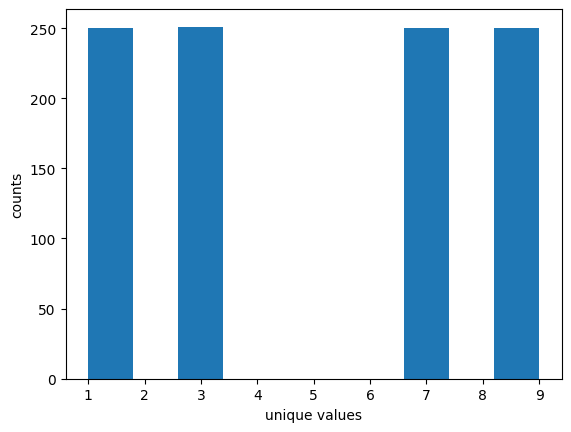

In [ ]:
I_0, A, C, M = 3, 7, 0, 10

sequence = []
sequence.append(I_0)

RNG_1 = RNG(I_0, A, C, M)

for i in range(1000):
  sequence.append(RNG_1.generate(sequence[-1]))

print(sequence[:10])



plt.hist(sequence)
plt.xlabel("unique values")
plt.ylabel("counts")

We notice peroidicy in the generated numbers. This is due to the modulus. The random number generated can never increase past the value of M. The value of m can be seen as the max valaue. The ratio of A to M determines the peroid of the rng.

### 2.1.2

Text(0, 0.5, '$x_{n+1}$')

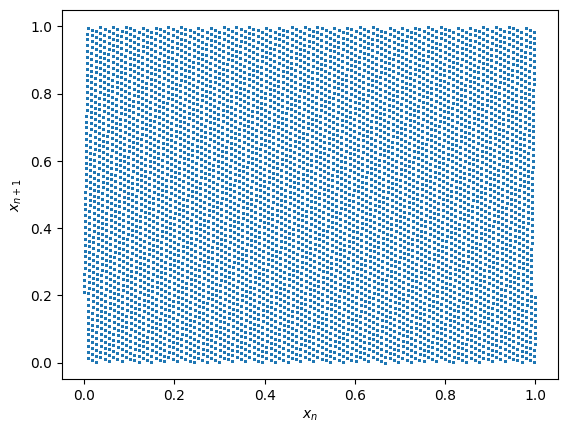

In [ ]:
I_0, A, C, M = 1, 106, 1283, 6075

RNG_1 = RNG(I_0, A, C, M)
x_1, x_2 = RNG_1.correlation()

plt.scatter(x_1, x_2, s=0.5)
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")

### 2.1.3

Text(0, 0.5, '$x_{n+1}$')

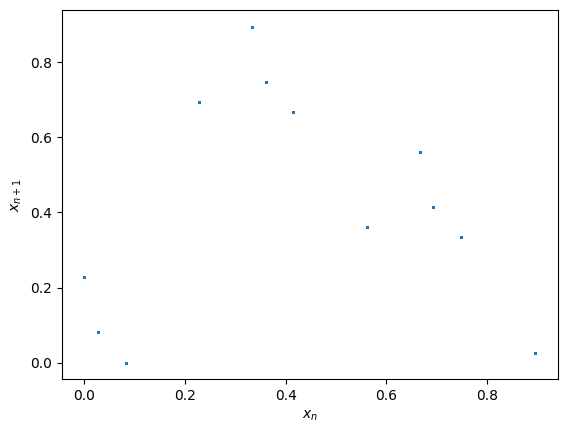

In [ ]:
# should have more points
I_0, A, C, M = 1, 107, 1283, 6075

RNG_1 = RNG(I_0, A, C, M)
x_1, x_2 = RNG_1.correlation()

plt.scatter(x_1, x_2, s=0.5)
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")

### 2.1.4

Text(0, 0.5, '$x_{n+1}$')

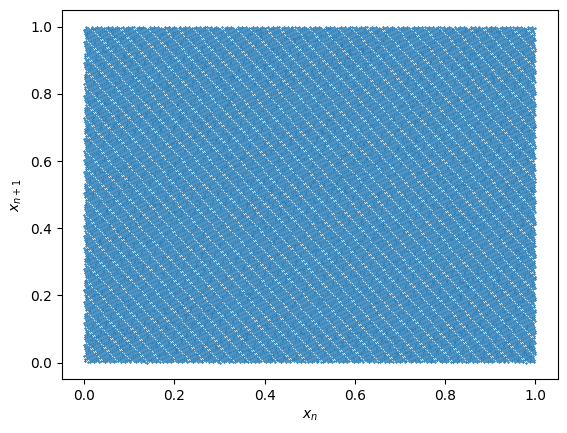

In [ ]:
DI_0, A, C, M = 1, 1103515245, 12345, 32768

RNG_1 = RNG(I_0, A, C, M)
x_1, x_2 = RNG_1.correlation()

plt.scatter(x_1, x_2, s=0.1)
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")

2.1.1.1

Text(0, 0.5, 'LAG k')

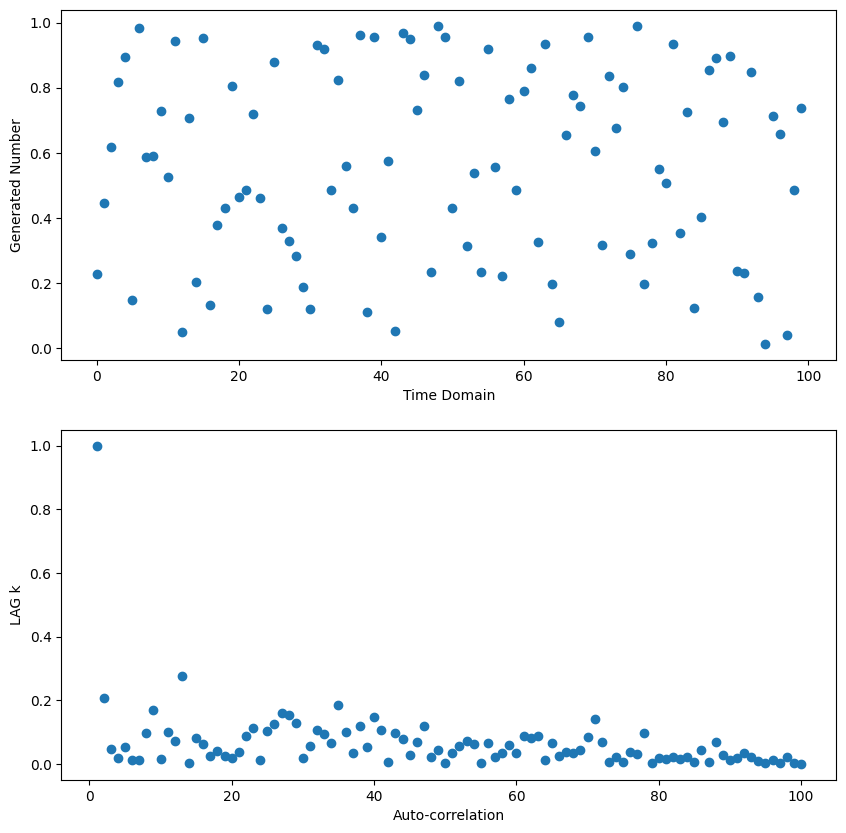

In [ ]:
I_0, A, C, M = 1, 106, 1283, 6075

RNG_1 = RNG(I_0, A, C, M)
x_1 = RNG_1.x_n(steps = 100)


correlation = auto_correlation(x_1)


fig, axes = plt.subplots(2, 1,figsize=(10,10))

axes[0].scatter(range(len(x_1)), x_1)
axes[0].set_xlabel("Time Domain")
axes[0].set_ylabel("Generated Number")

axes[1].scatter(np.arange(1,101), np.abs(correlation))
axes[1].set_xlabel("Auto-correlation")
axes[1].set_ylabel("LAG k")

2.1.1.2

Text(0, 0.5, 'LAG k')

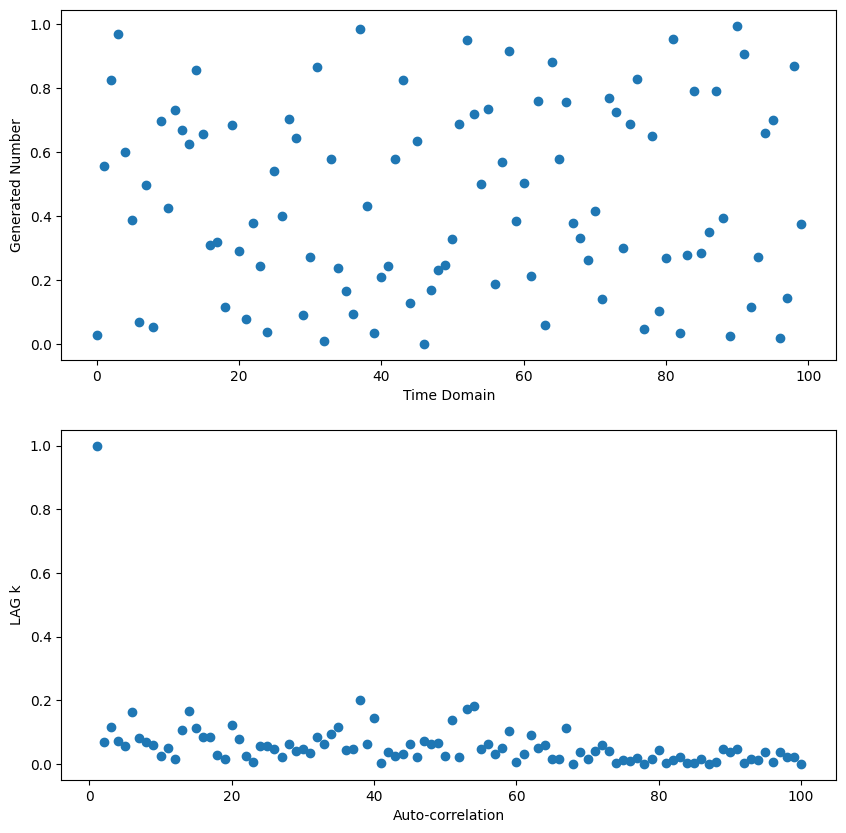

In [ ]:
x_1 = np.random.random(size=100)

correlation = auto_correlation(x_1)

fig, axes = plt.subplots(2, 1,figsize=(10,10))

axes[0].scatter(range(len(x_1)), x_1)
axes[0].set_xlabel("Time Domain")
axes[0].set_ylabel("Generated Number")

axes[1].scatter(np.arange(1,101), np.abs(correlation))
axes[1].set_xlabel("Auto-correlation")
axes[1].set_ylabel("LAG k")

# Radiative Transfer

In [ ]:
class Photon:
  """
  Creates a photon to travel within our slab
  """
  def __init__(self) -> None:
    self.position = np.zeros(3)
    self.direction = np.zeros(3)

    self.history = []
    self.history.append(np.copy(self.position))


  def update_x_direction(self, theta, phi):
    return np.sin(theta) * np.cos(phi)

  def update_y_direction(self, theta, phi):
    return np.sin(theta) * np.sin(phi)

  def update_z_direction(self, theta):
    return np.cos(theta)

  def update_direction(self, theta, phi):

    x = self.update_x_direction(theta,phi)
    y = self.update_y_direction(theta,phi)
    z = self.update_z_direction(theta)

    self.direction[0], self.direction[1], self.direction[2] = x, y , z

    return

  def update_position(self, L):
    
    self.position[0] += L * self.direction[0]
    self.position[1] += L * self.direction[1]
    self.position[2] += L * self.direction[2]

    self.history.append(np.copy(self.position))
    return

In [ ]:
class RadiativeTransfer:
  def __init__(self, tau_max, sigma_s, sigma_a, N):

    #initialize first photon
    self.photon = Photon()

    # initialize constants
    self.tau_max = tau_max

    self.sigma_s = sigma_s
    self.sigma_a = sigma_a
    self.prob = sigma_s / (sigma_a + sigma_s)

    self.z_max = 1

    #for binning 
    self.bins = np.linspace(0,1, N+1)
    self.counting_bins = np.zeros(N)
    self.N = N

    
  def optical_depth(self):
    zeta = np.random.random()
    tau_max = self.tau_max

    return - np.log(1 - zeta * (1 - np.exp(-tau_max)))

  def theta(self):
    zeta = np.random.random()
    return np.arccos(1-2*zeta)

  def phi(self):
    zeta = np.random.random()
    return 2 * np.pi * zeta
  
  def distance_travelled(self, tau):
    z_max = self.z_max
    tau_max = self.tau_max
    return tau * z_max /  tau_max


  def out_of_bounds(self):
    photon = self.photon

    if photon.position[2] < 0 or photon.position[2] > self.z_max:
      return True
    
    else:
      return False

  def absorbed(self):
    zeta = np.random.random()

    prob = self.prob

    if prob < zeta:
      return True

    else: 
      return False 
    
  def simulate(self):
    loop = 10**5
    i = 1
    empty = False
    # number of itterations
    while(i < loop and empty == False):

      #check to see if photon is in slab
      if self.out_of_bounds() or self.absorbed():
        

        # check to see if itterations have maxed
        # if maxed stop sending photons

        if (i < loop):
          mu = np.cos(current_theta)
          if mu> 0 and mu < 1:
            self.binning(mu)

          self.photon = Photon()
          i += 1

        else:
          empty = True
          # log $\mu$
          mu = np.cos(current_theta)
          if mu> 0 and mu < 1:
            self.binning(mu)
      

      # keep scattering
      else:
        current_tau = self.optical_depth()
        current_theta = self.theta()
        current_phi = self.phi()
        current_L = self.distance_travelled(current_tau)
        
        self.photon.update_direction(current_theta, current_phi)
        self.photon.update_position(current_L)
      
    return

  def binning(self, mu):

    counting_bins = self.counting_bins
    bins = self.bins

    for i in range(len(bins)):
      if (mu < bins[i+1]):
        counting_bins[i] += 1
        break
    
    self.counting_bins = counting_bins
    return
  
  def energy(self):
    counting_bins = self.counting_bins
    energy = counting_bins / np.sum(counting_bins)

    self.energy_values = energy

    return

  def intensity(self):
    energy = self.energy_values
    counting_bins = self.counting_bins
    bins = self.bins

    mu_i = np.zeros(len(counting_bins))

    for i in range(len(mu_i)):
      mu_i[i] = (bins[i] + bins[i+1]) / 2

    self.mu_i = mu_i

    intensity = energy * self.N/ (2*np.sum(counting_bins)*mu_i)

    self.intensity_values = intensity
    return 




3.6.1

Text(0, 0.5, 'Counts')

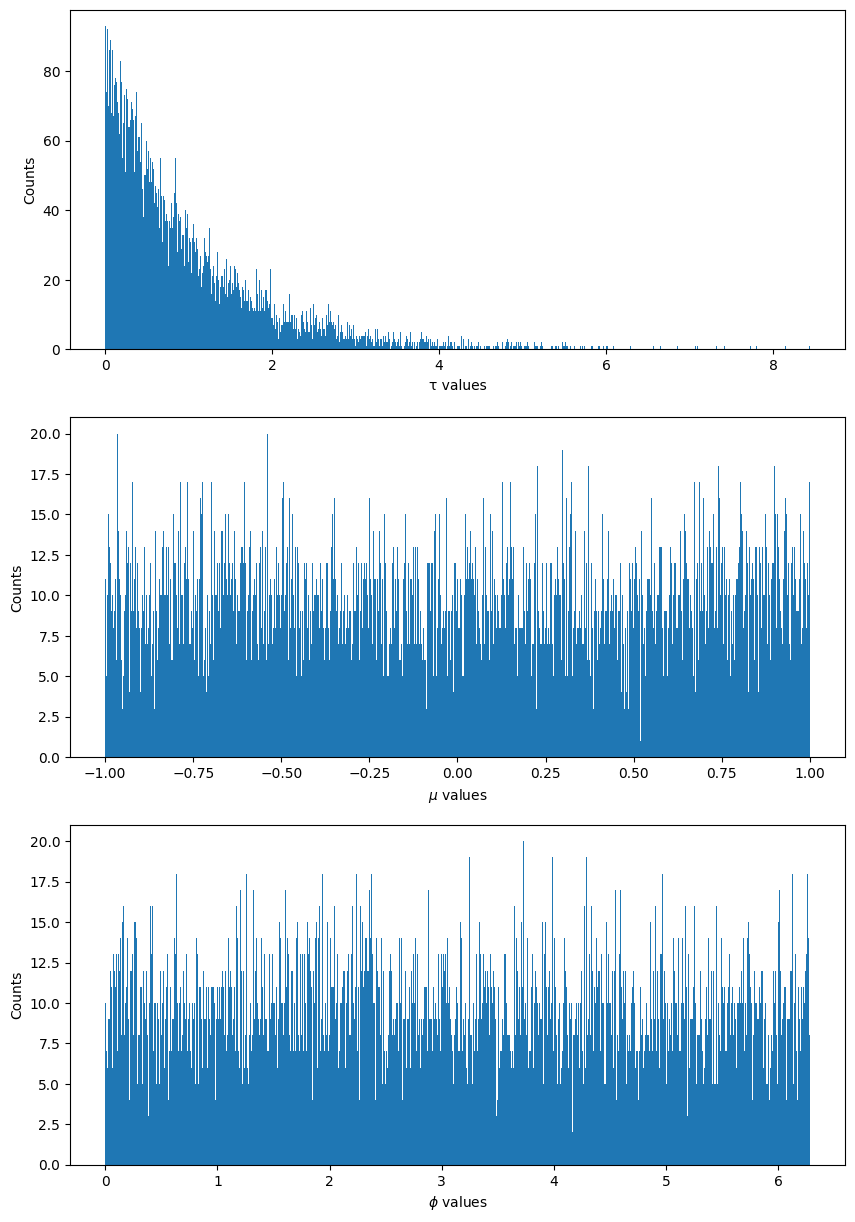

In [ ]:
a = RadiativeTransfer(10, 1, 0, 1)

tau_list = []
mu_list = []
phi_list = []

for i in range(10**4):
  tau_list.append(a.optical_depth())
  mu_list.append(np.cos(a.theta()))
  phi_list.append(a.phi())

fig, axes = plt.subplots(3, 1,figsize=(10,15))
axes[0].hist(tau_list, bins= 1000)
axes[0].set_xlabel("τ values")
axes[0].set_ylabel("Counts")

axes[1].hist(mu_list, bins=1000)
axes[1].set_xlabel("$\mu$ values")
axes[1].set_ylabel("Counts")

axes[2].hist(phi_list, bins=1000)
axes[2].set_xlabel("$\phi$ values")
axes[2].set_ylabel("Counts")


3.6.2

Text(0, 0.5, 'Intensity')

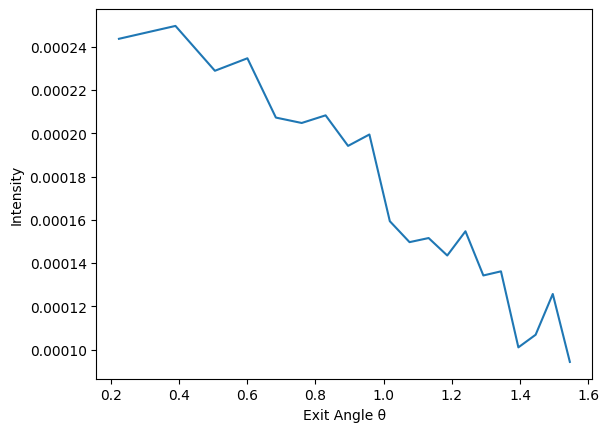

In [ ]:
tau_max = 10
N_mu = 20

sigma_a = 0
sigma_s = 1


pure_scatter = RadiativeTransfer(tau_max, sigma_s, sigma_a, N_mu)
pure_scatter.simulate()
pure_scatter.energy()
pure_scatter.intensity()

plt.plot(np.arccos(pure_scatter.mu_i), pure_scatter.intensity_values)
plt.xlabel("Exit Angle θ")
plt.ylabel("Intensity")





3.6.2

Text(0, 0.5, 'Intensity')

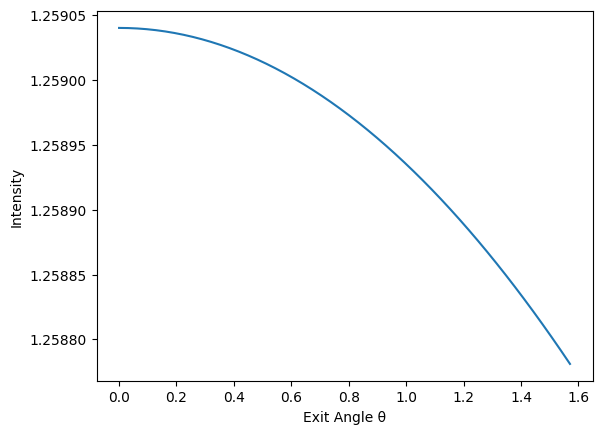

In [ ]:
theta = np.linspace(0, np.pi/2)

def analytical(theta):
  return 0.0244 * (51.6 - 0.0043 * theta**2)
plt.plot(theta, analytical(theta))
plt.xlabel("Exit Angle θ")
plt.ylabel("Intensity")

3.6.3

Text(0, 0.5, 'Intensity')

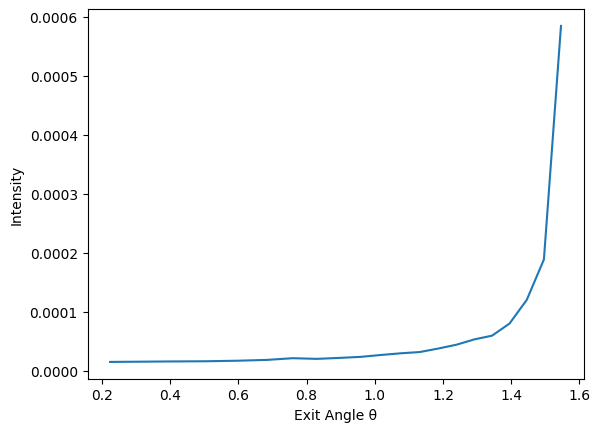

In [ ]:
tau_max = 10
N_mu = 20

sigma_a = 0.5
sigma_s = 0.5


pure_scatter = RadiativeTransfer(tau_max, sigma_s, sigma_a, N_mu)
pure_scatter.simulate()
pure_scatter.energy()
pure_scatter.intensity()

plt.plot(np.arccos(pure_scatter.mu_i), pure_scatter.intensity_values)
plt.xlabel("Exit Angle θ")
plt.ylabel("Intensity")





# Markov Chain

4.1.2.1

P_100 matrix is: 
 [[0.83333333 0.16666667]
 [0.83333333 0.16666667]]


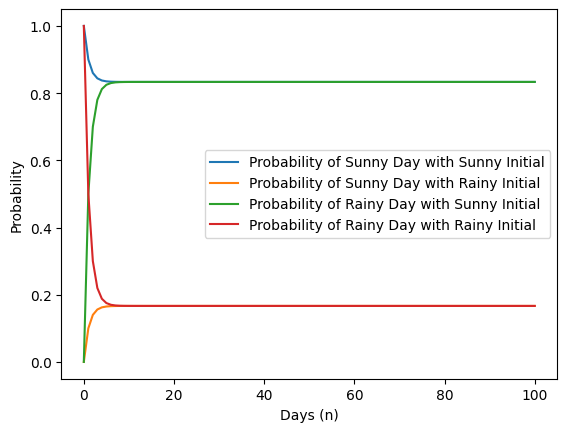

In [ ]:
def forcast(initial_state, n):

  transition_matrix = np.array([[0.9, 0.1],[0.5, 0.5]])
  power = np.linalg.matrix_power(transition_matrix, n)
  return np.matmul(initial_state, power)

sunny_day = np.array([1, 0])
rainy_day = np.array([0, 1])


sunny_day_sunny_day = []
sunny_day_rainy_day = []

rainy_day_sunny_day = []
rainy_day_rainy_day = []

for n in range(101):
  sunny_day_sunny_day.append(forcast(sunny_day, n)[0])
  sunny_day_rainy_day.append(forcast(sunny_day, n)[1])
  rainy_day_sunny_day.append(forcast(rainy_day, n)[0])
  rainy_day_rainy_day.append(forcast(rainy_day, n)[1])

plt.plot(range(101), sunny_day_sunny_day, label= "Probability of Sunny Day "+
         "with Sunny Initial")
plt.plot(range(101), sunny_day_rainy_day, label="Probability of Sunny Day "+
         "with Rainy Initial")
plt.plot(range(101), rainy_day_sunny_day, label="Probability of Rainy Day "+ 
         "with Sunny Initial")
plt.plot(range(101), rainy_day_rainy_day, label="Probability of Rainy Day "+
         "with Rainy Initial")
plt.xlabel("Days (n)")
plt.ylabel("Probability")
plt.legend()


P_matrix = np.linalg.matrix_power(np.matrix([[0.9,0.1],[0.5,0.5]]),10000)
print("P_100 matrix is: \n",P_matrix)

4.1.2.2

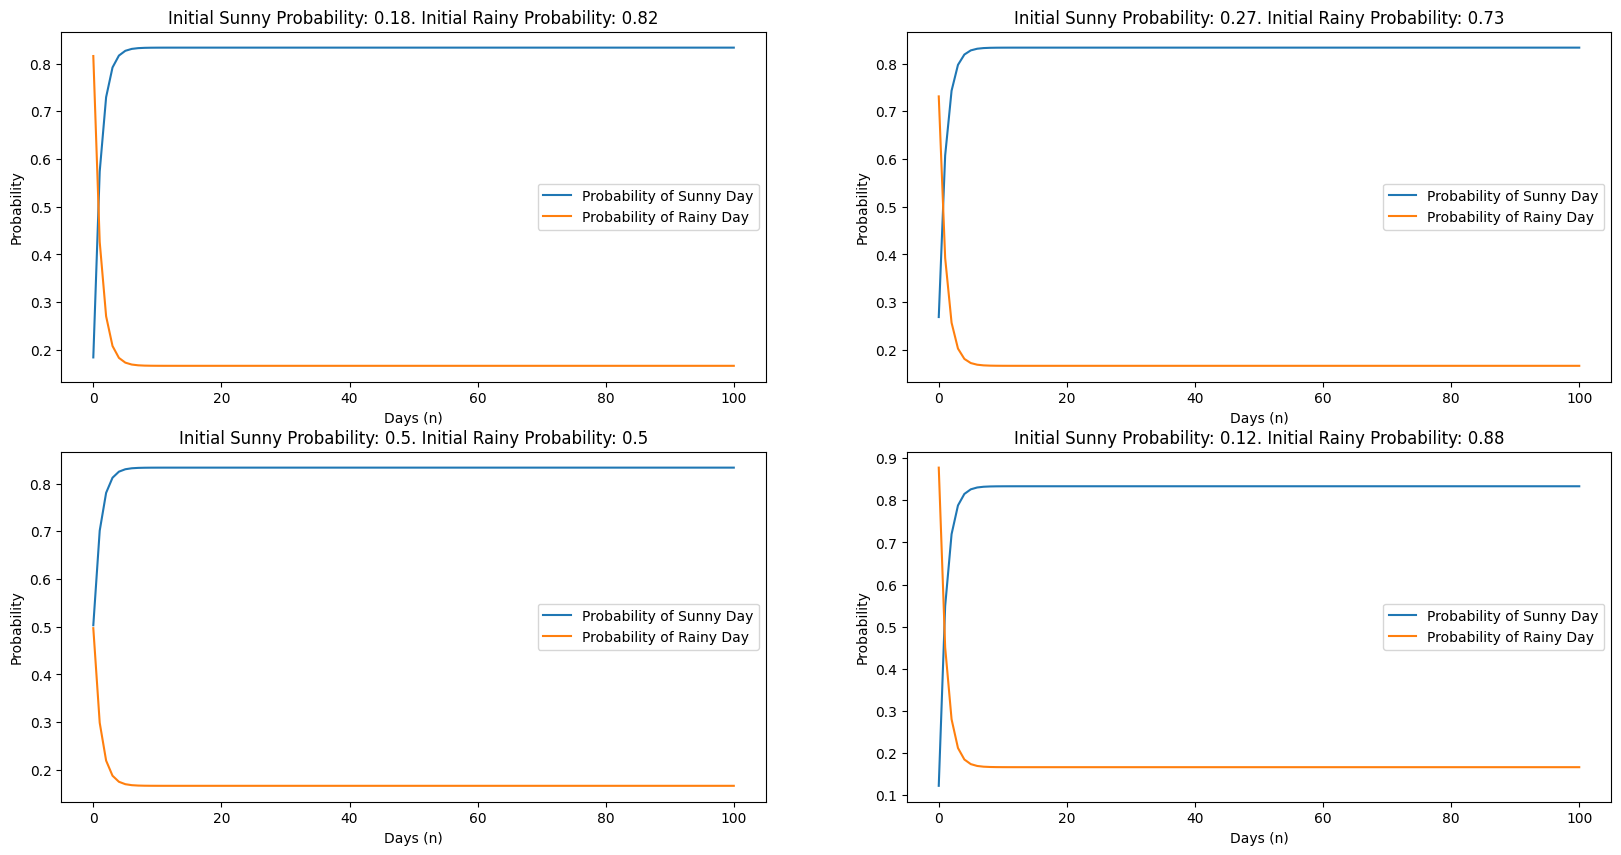

In [ ]:
data = []
for i in range(4):
  sun_initial = np.random.random()
  rain_initial = 1 - sun_initial

  state = np.array([sun_initial, rain_initial])

  prob_sunny = []
  prob_rain = []

  for i in range(101):
    prob_sunny.append(forcast(state, i)[0])
    prob_rain.append(forcast(state, i)[1])

  data.append([state, prob_sunny, prob_rain])

fig, axes = plt.subplots(2,2, figsize=(20,10))

for i in range(2):
  axes[0][i].plot(range(101), data[i][1], label = "Probability of Sunny Day")
  axes[0][i].plot(range(101), data[i][2], label = "Probability of Rainy Day")
  axes[0][i].set_xlabel("Days (n)")
  axes[0][i].set_ylabel("Probability")
  axes[0][i].legend()
  axes[0][i].title.set_text("Initial Sunny Probability: " + 
                            str(round(data[i][0][0], 2)) +
                            ". Initial Rainy Probability: " +
                            str(round(data[i][0][1], 2)))
  
for i in range(2):
  axes[1][i].plot(range(101), data[i+2][1], label = "Probability of Sunny Day")
  axes[1][i].plot(range(101), data[i+2][2], label = "Probability of Rainy Day")
  axes[1][i].set_xlabel("Days (n)")
  axes[1][i].set_ylabel("Probability")
  axes[1][i].legend()
  axes[1][i].title.set_text("Initial Sunny Probability: " + 
                            str(round(data[i+2][0][0], 2)) +
                            ". Initial Rainy Probability: " +
                            str(round(data[i+2][0][1], 2)))



# 4.2 Random-Walk Metropolis

In [ ]:
class Metropolis_Hasting:
  def __init__(self, target_pdf, sigma) -> None:
    self.target_pdf = target_pdf
    self.sigma = sigma
    self.acceptance_data = []

  def proposal_pdf(self, current_x):
    sigma = self.sigma
    return random.normalvariate(current_x, sigma)

  def acceptance(self, current_x, proposed_x, target_pdf, proposal_pdf):
    return min(1, target_pdf(proposed_x) / target_pdf(current_x))

  def run(self, x_1, max_itteration, output_ignore):
    samples = []
    samples.append(x_1)
    acceptance_data = []
    
    for i in range(1, max_itteration):
      current_x = samples[-1]
      y = self.proposal_pdf(current_x)
      alpha = self.acceptance(current_x, y, self.target_pdf, self.proposal_pdf)
      acceptance_data.append(alpha)
      u = np.random.uniform(low = 0, high = 1)
      if u < alpha:
        samples.append(y)
      else:
        samples.append(current_x)
    self.acceptance_data = acceptance_data[output_ignore:]
    return samples[output_ignore:]
      

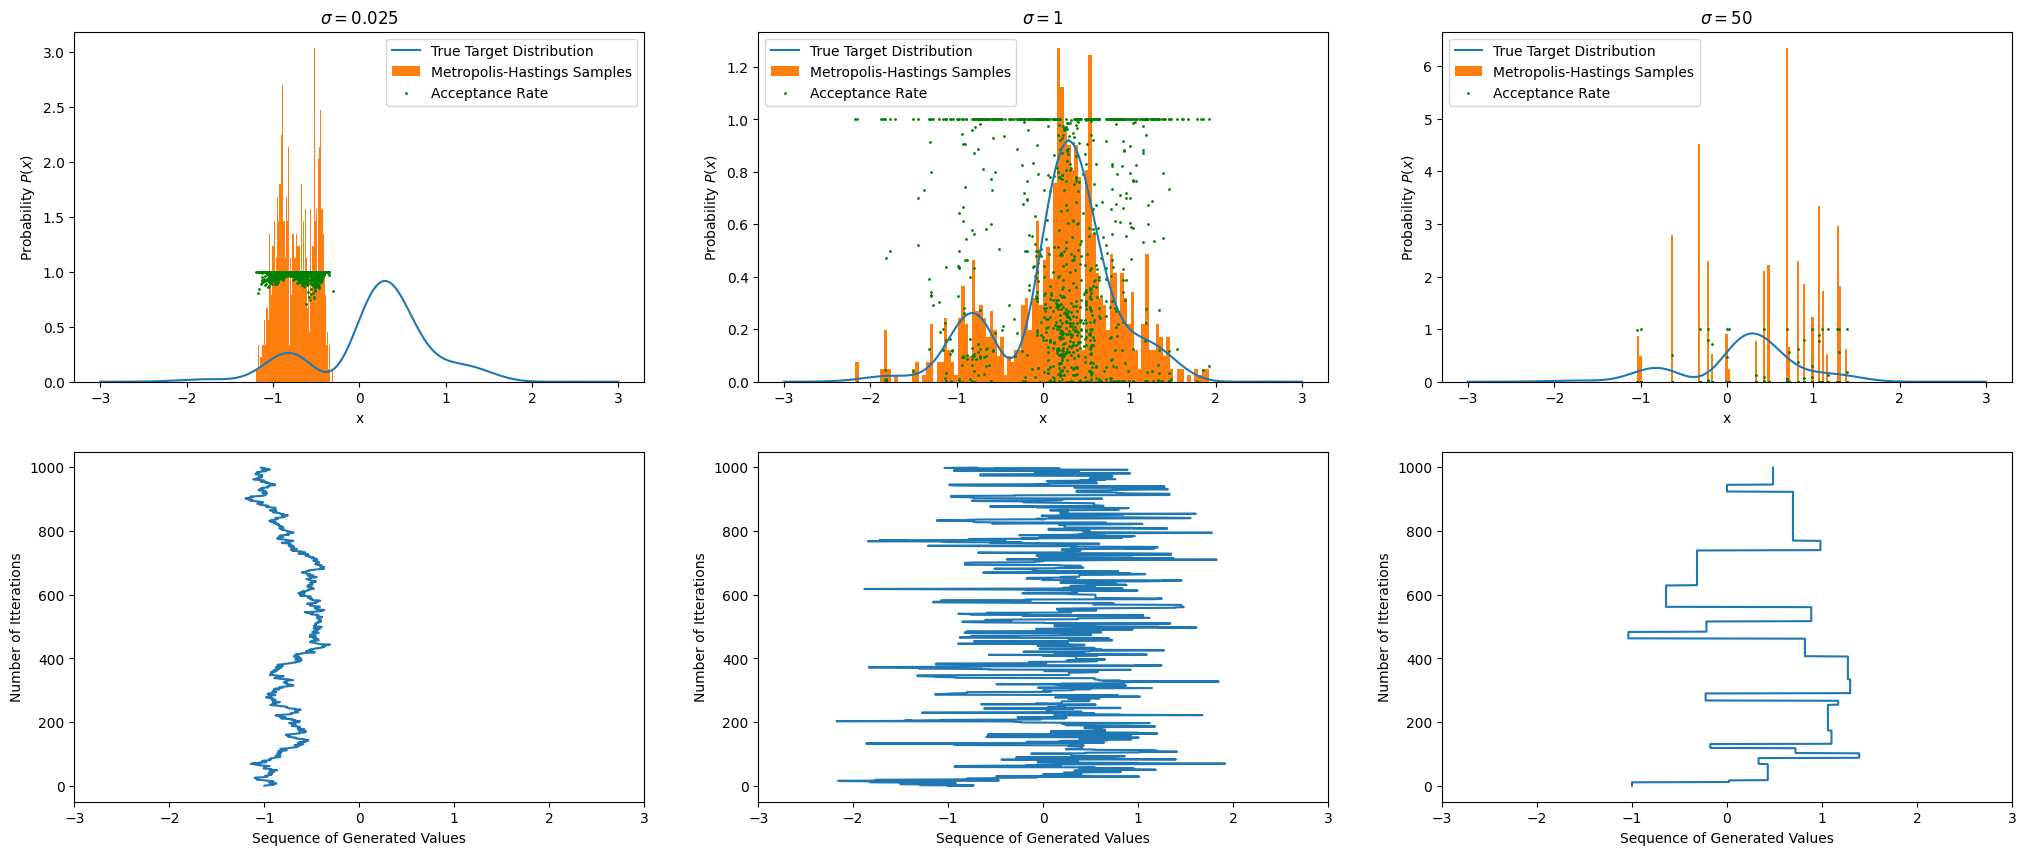

In [ ]:
def target_pdf(x):
  return 1/(2 * np.sqrt(np.pi)) * (np.sin(5 * x) + np.sin(2 * x) + 2) *\
   np.exp(-x**2)

example_25 = Metropolis_Hasting(target_pdf, 0.025)
data_25 = example_25.run(x_1=-1, max_itteration=1000, output_ignore=0)


example_1 = Metropolis_Hasting(target_pdf, 1)
data_1 = example_1.run(x_1=-1, max_itteration=1000, output_ignore=0)

example_50 = Metropolis_Hasting(target_pdf, 50)
data_50 = example_50.run(x_1=-1, max_itteration=1000, output_ignore=0)


fig, axes = plt.subplots(2,3, figsize=(25,10))
data = [data_25,data_1, data_50]
examples = [example_25, example_1, example_50]
sigma = [0.025, 1, 50]

for i in range(3):
  axes[0][i].plot(np.linspace(-3,3, 200), target_pdf(np.linspace(-3,3, 200)), label="True Target Distribution")
  axes[0][i].hist(data[i], bins=100, density=True, label="Metropolis-Hastings Samples")
  axes[0][i].scatter(data[i][:-1], examples[i].acceptance_data, color = "green",s=1 ,label = "Acceptance Rate")
  axes[0][i].set_ylabel("Probability $P(x)$")
  axes[0][i].set_xlabel("x")
  axes[0][i].title.set_text("$\sigma = $" + str(sigma[i]))
  axes[0][i].legend()

  axes[1][i].plot(data[i], range(len(data[i])))
  axes[1][i].set_xlabel("Sequence of Generated Values")
  axes[1][i].set_ylabel("Number of Itterations")
  axes[1][i].set_xlim(-3,3)

Increased Itterations from 1,000 to 50,000

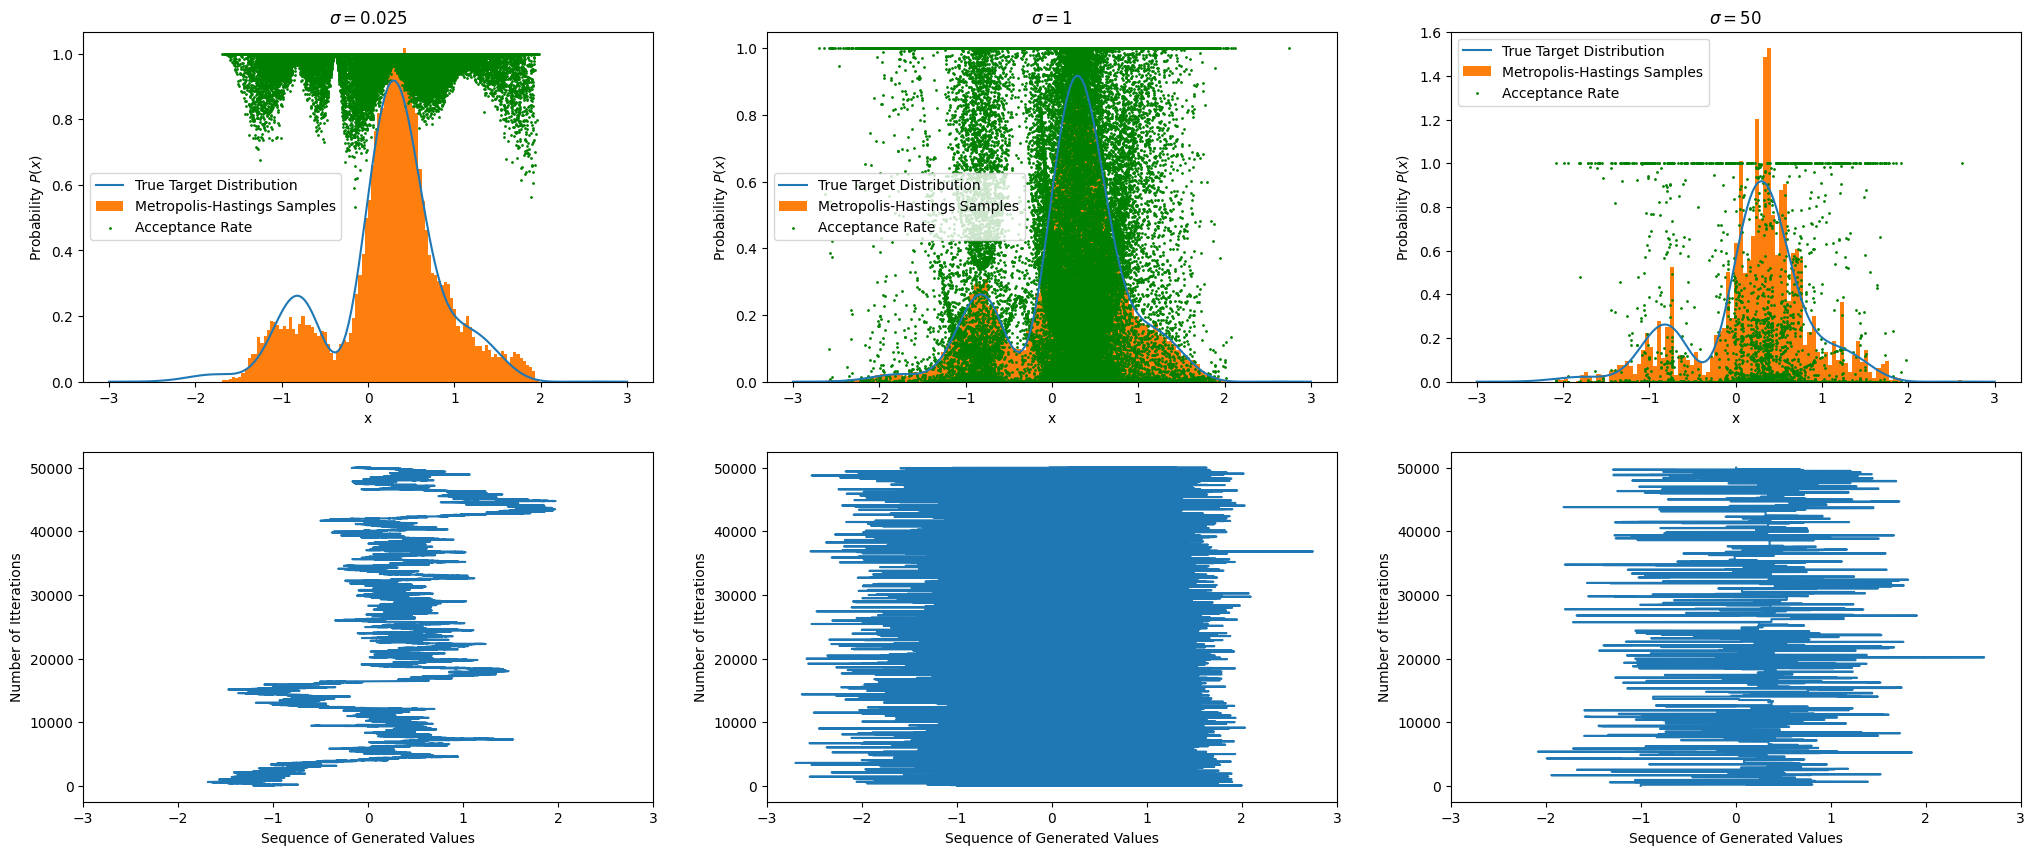

In [ ]:
example_25 = Metropolis_Hasting(target_pdf, 0.025)
data_25 = example_25.run(x_1=-1, max_itteration=50000, output_ignore=0)


example_1 = Metropolis_Hasting(target_pdf, 1)
data_1 = example_1.run(x_1=-1, max_itteration=50000, output_ignore=0)

example_50 = Metropolis_Hasting(target_pdf, 50)
data_50 = example_50.run(x_1=-1, max_itteration=50000, output_ignore=0)


fig, axes = plt.subplots(2,3, figsize=(25,10))
data = [data_25,data_1, data_50]
examples = [example_25, example_1, example_50]
sigma = [0.025, 1, 50]

for i in range(3):
  axes[0][i].plot(np.linspace(-3,3, 200), target_pdf(np.linspace(-3,3, 200)), label="True Target Distribution")
  axes[0][i].hist(data[i], bins=100, density=True, label="Metropolis-Hastings Samples")
  axes[0][i].scatter(data[i][:-1], examples[i].acceptance_data, color = "green",s=1 ,label = "Acceptance Rate")
  axes[0][i].set_ylabel("Probability $P(x)$")
  axes[0][i].set_xlabel("x")
  axes[0][i].title.set_text("$\sigma = $" + str(sigma[i]))
  axes[0][i].legend()

  axes[1][i].plot(data[i], range(len(data[i])))
  axes[1][i].set_xlabel("Sequence of Generated Values")
  axes[1][i].set_ylabel("Number of Itterations")
  axes[1][i].set_xlim(-3,3)

Burn in phase

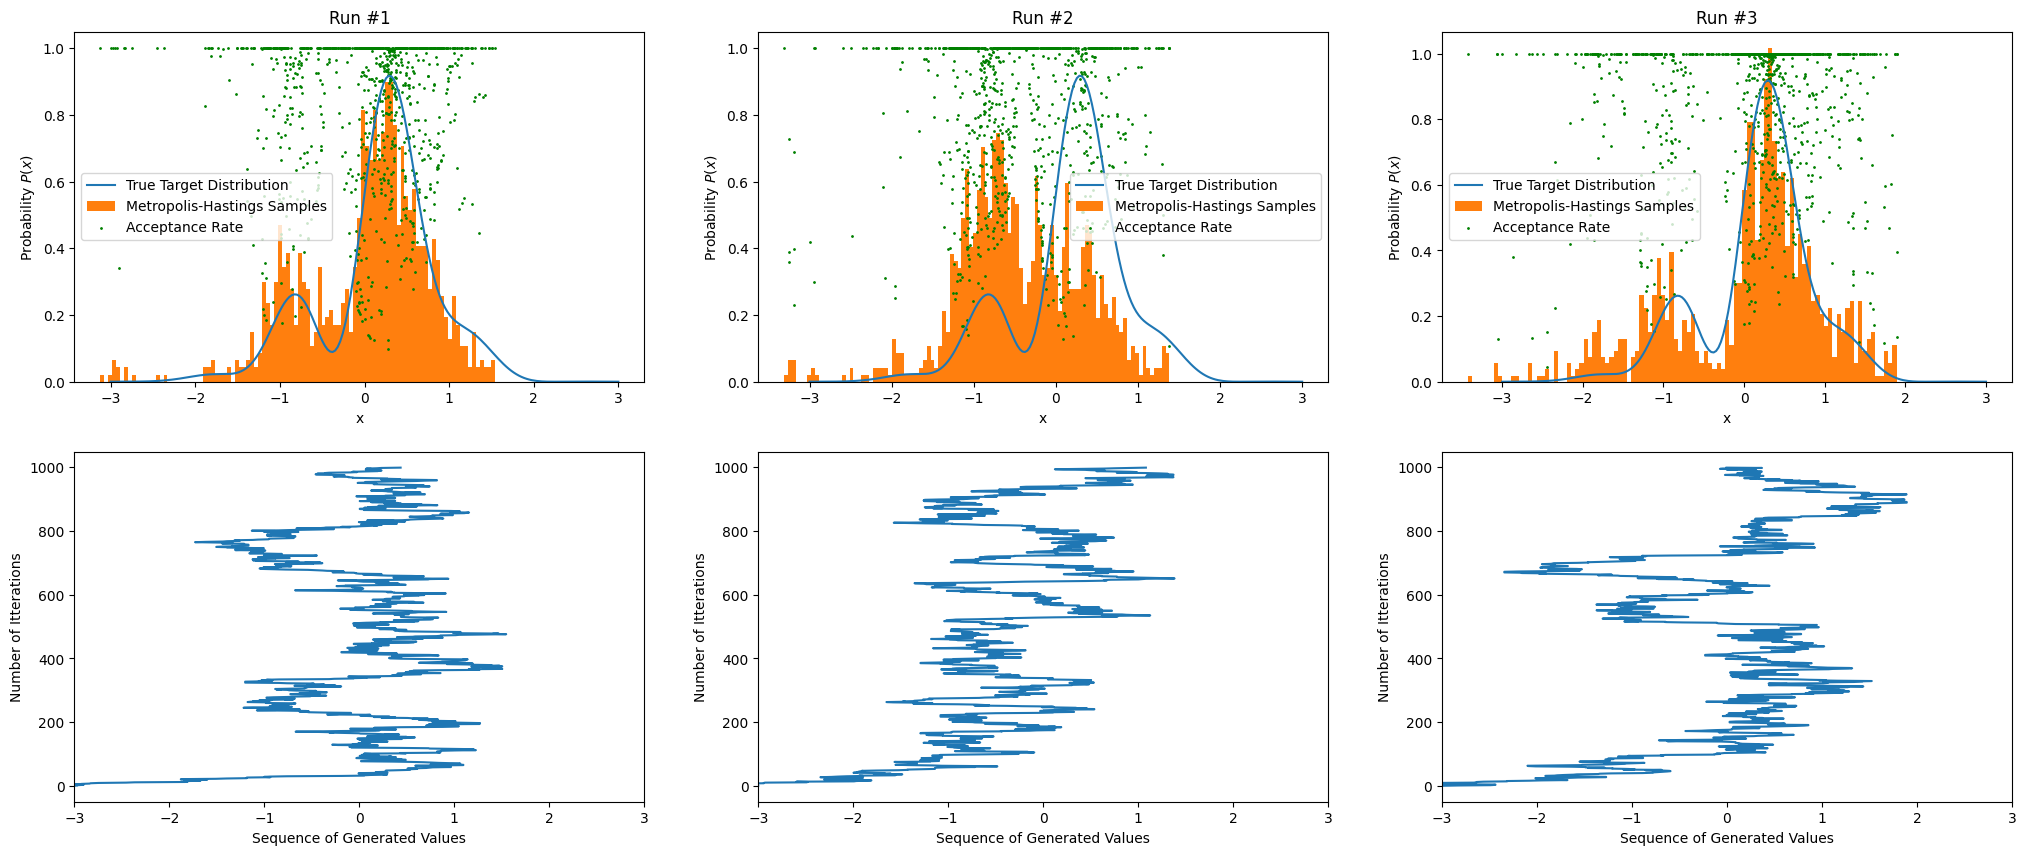

In [ ]:
example_25 = Metropolis_Hasting(target_pdf, 0.2)
data_25 = example_25.run(x_1=-3, max_itteration=1000, output_ignore=0)


example_1 = Metropolis_Hasting(target_pdf, 0.2)
data_1 = example_1.run(x_1=-3, max_itteration=1000, output_ignore=0)

example_50 = Metropolis_Hasting(target_pdf, 0.2)
data_50 = example_50.run(x_1=-3, max_itteration=1000, output_ignore=0)


fig, axes = plt.subplots(2,3, figsize=(25,10))
data = [data_25,data_1, data_50]
examples = [example_25, example_1, example_50]
sigma = [0.2, 0.2, 0.2]

for i in range(3):
  axes[0][i].plot(np.linspace(-3,3, 200), target_pdf(np.linspace(-3,3, 200)), label="True Target Distribution")
  axes[0][i].hist(data[i], bins=100, density=True, label="Metropolis-Hastings Samples")
  axes[0][i].scatter(data[i][:-1], examples[i].acceptance_data, color = "green",s=1 ,label = "Acceptance Rate")
  axes[0][i].set_ylabel("Probability $P(x)$")
  axes[0][i].set_xlabel("x")
  axes[0][i].title.set_text("Run #" + str(i+1))
  axes[0][i].legend()

  axes[1][i].plot(data[i], range(len(data[i])))
  axes[1][i].set_xlabel("Sequence of Generated Values")
  axes[1][i].set_ylabel("Number of Itterations")
  axes[1][i].set_xlim(-3,3)

Ignore Initial 200 Values

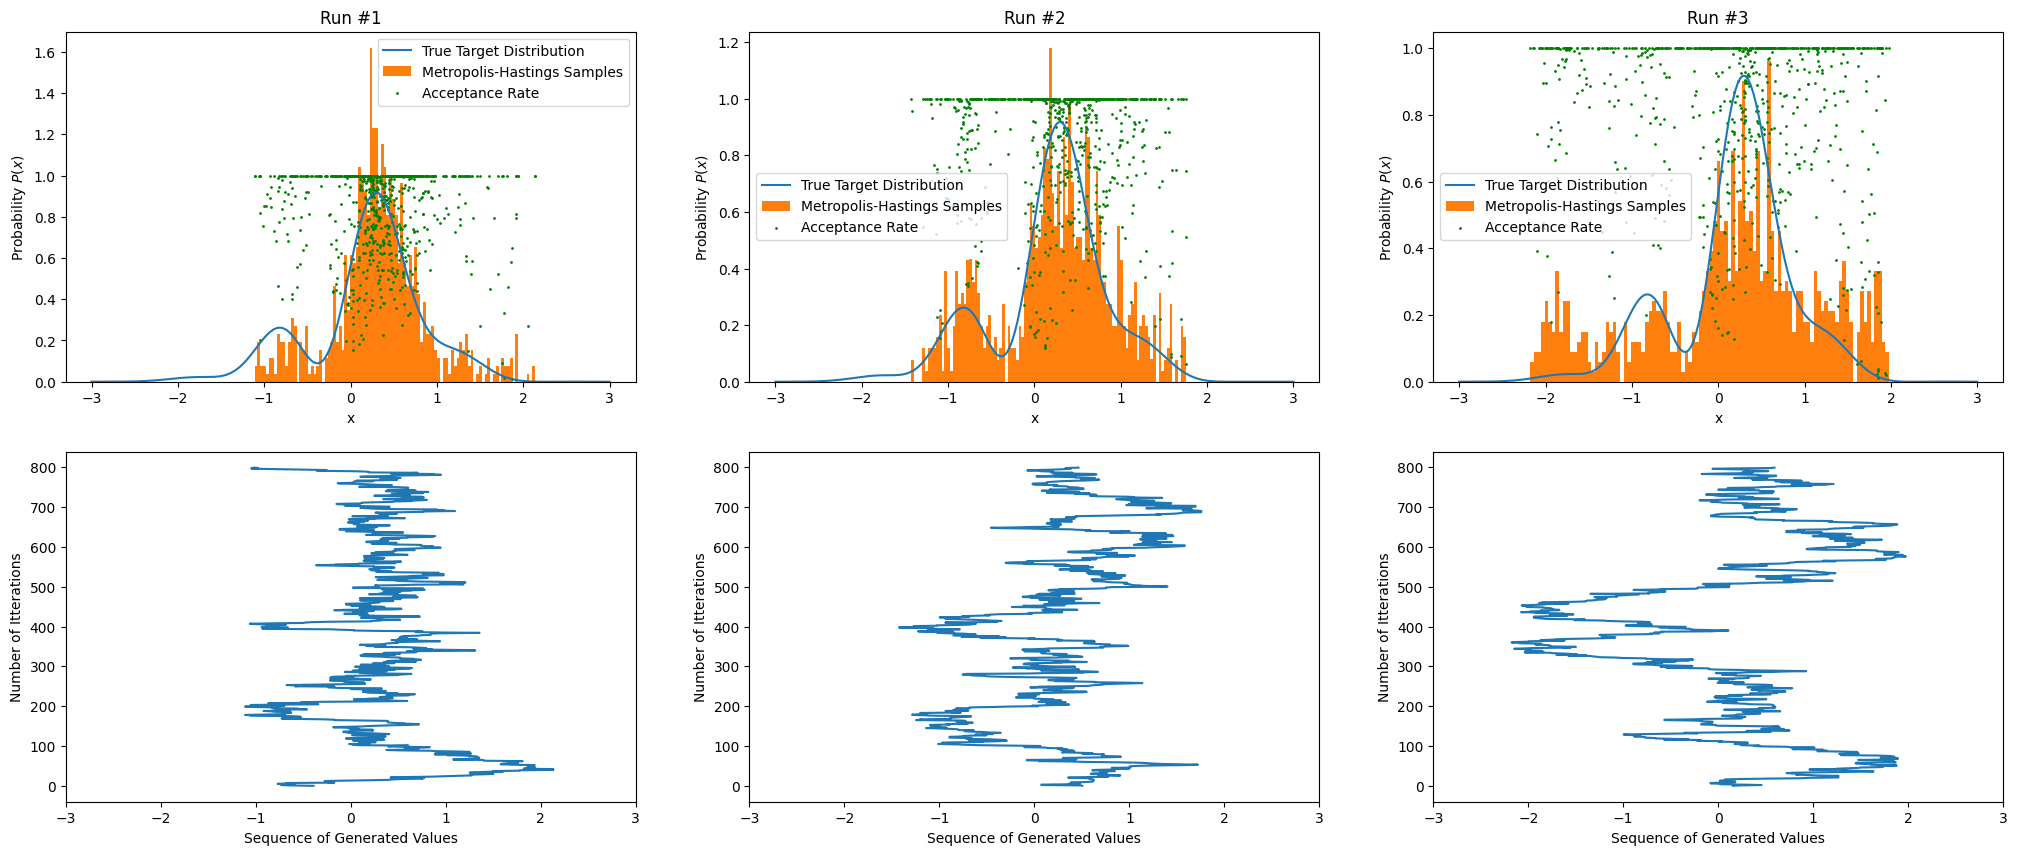

In [ ]:
example_25 = Metropolis_Hasting(target_pdf, 0.2)
data_25 = example_25.run(x_1=-3, max_itteration=1000, output_ignore=200)


example_1 = Metropolis_Hasting(target_pdf, 0.2)
data_1 = example_1.run(x_1=-3, max_itteration=1000, output_ignore=200)

example_50 = Metropolis_Hasting(target_pdf, 0.2)
data_50 = example_50.run(x_1=-3, max_itteration=1000, output_ignore=200)


fig, axes = plt.subplots(2,3, figsize=(25,10))
data = [data_25,data_1, data_50]
examples = [example_25, example_1, example_50]
sigma = [0.2, 0.2, 0.2]

for i in range(3):
  axes[0][i].plot(np.linspace(-3,3, 200), target_pdf(np.linspace(-3,3, 200)), label="True Target Distribution")
  axes[0][i].hist(data[i], bins=100, density=True, label="Metropolis-Hastings Samples")
  axes[0][i].scatter(data[i][:-1], examples[i].acceptance_data, color = "green",s=1 ,label = "Acceptance Rate")
  axes[0][i].set_ylabel("Probability $P(x)$")
  axes[0][i].set_xlabel("x")
  axes[0][i].title.set_text("Run #" + str(i+1))
  axes[0][i].legend()

  axes[1][i].plot(data[i], range(len(data[i])))
  axes[1][i].set_xlabel("Sequence of Generated Values")
  axes[1][i].set_ylabel("Number of Itterations")
  axes[1][i].set_xlim(-3,3)

In [ ]:
class Simulated_Annealing:
  def __init__(self, target_function, sigma) -> None:
    self.target_function = target_function
    self.sigma = sigma

  def proposal_pdf(self, current_x):
    sigma = self.sigma
    return random.normalvariate(current_x, sigma)

  def acceptance(self, delta_E, T):
    return min(1, np.exp(-delta_E/ T))

  def cooling_schedule(self, t, T_0, T_f, n):
    return max(T_f, T_0 * (T_f / T_0) ** (t / n))

  def run(self, x_0, y_0, max_itteration, T_0, T_f, time_itterations):
    current_x = x_0
    current_y = y_0

    t = 0
    T = self.cooling_schedule(t, T_0, T_f, time_itterations)
    while T > T_f:
      
      for i in range(int(max_itteration)):
        x_w = self.proposal_pdf(current_x)
        y_w = self.proposal_pdf(current_y)

        #cost function
        delta_E = self.target_function(x_w, y_w) - self.target_function(current_x, current_y)

        if delta_E <= 0:
          current_x = x_w
          current_y = y_w
        
        else:
          r = np.random.random()
          if r <= self.acceptance(delta_E, T):
            current_x = x_w
            current_y = y_w

      
      t += 1
      T = self.cooling_schedule(t, T_0, T_f, time_itterations)

    return current_x, current_y

In [ ]:
def function_1(x, y):
  return np.exp(-(x**2 + y**2))

def function_1_min(x, y):
  return -np.exp(-(x**2 + y**2))

def function_2(x, y):
  return np.exp(-(x**2 + y**2)) + 2 * np.exp(-((x-1.7)**2 + (y-1.7)**2))

def function_2_min(x, y):
  return -np.exp(-(x**2 + y**2)) + 2 * np.exp(-((x-1.7)**2 + (y-1.7)**2))

def function_3(x, y):
  return (1-x)**2 + 100 * (y-x**2)**2

def function_3_min(x,y):
  return -(1-x)**2 + 100 * (y-x**2)**2

#function 1
max_function_1 = Simulated_Annealing(function_1, 0.5)
max_x_function_1, max_y_function_1 = max_function_1.run(0, 0, 100, 2, 1, 10)

min_function_1 = Simulated_Annealing(function_1_min, 0.5)
min_x_function_1, min_y_function_1 = min_function_1.run(0, 0, 100, 2, 1, 10)


#function 2
max_function_2 = Simulated_Annealing(function_2, 0.5)
max_x_function_2, max_y_function_2 = max_function_2.run(0, 0, 100, 2, 1, 10)

min_function_2 = Simulated_Annealing(function_2_min, 0.5)
min_x_function_2, min_y_function_2 = min_function_2.run(0, 0, 100, 2, 1, 10)

#function 3
max_function_3 = Simulated_Annealing(function_3, 0.5)
max_x_function_3, max_y_function_3 = max_function_3.run(0, 0, 100, 2, 1, 10)

min_function_3 = Simulated_Annealing(function_3_min, 0.5)
min_x_function_3, min_y_function_3 = min_function_3.run(0, 0, 100, 2, 1, 10)

In [ ]:
#function 1
print("function 1")
print(max_x_function_1, max_y_function_1)
print(min_x_function_1, min_y_function_1)

#function 2
print("function 2")
print(max_x_function_2, max_y_function_2)
print(min_x_function_2, min_y_function_2)

#function 3
print("function 3")
print(max_x_function_3, max_y_function_3)
print(min_x_function_3, min_y_function_3)

function 1
-0.5917430565384949 -3.0564232843266126
-23.460108245760598 -9.367423342984509
function 2
3.8487611972264757 5.5309781169622285
15.074283580868945 -15.505915766661849
function 3
1.2935735186517858 1.5842079055484526
-2.4040667765409527 5.7911509906466385
